Connecting to Drive

Go to Google Drive, right click on the folder in question, and then click "Add shortcut to Drive". This will allow you to access the folder from your drive!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Alternative Music to Spectrogram & Spectrogram to Music Online](https://directmusic.me/wav2png/)
(Different images so we have to decide on which images we will go on.)

**Converting mp3 files to mono wav files**

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os 

**Converting single mp4 file to mono wav**

In [ ]:
from os import path
from pydub import AudioSegment
from os import listdir
from os.path import isfile, join

# files
src = "/content/drive/MyDrive/Workshop2022/Dataset/Music/mp4/" #file location of mp4 files
file_names = os.listdir(src)
source_file = src + file_names[0]
print(source_file)
dst = "/content/drive/MyDrive/Workshop2022/Dataset/Music/" #file location of wav files
dest_file_name = file_names[0].replace('.mp4', '.wav')
dest_file = dst + dest_file_name

# convert mp3 to wav
sound = AudioSegment.from_file(source_file, format="mp4")
sound = sound.set_channels(1)
with open(dest_file, 'w') as file:
  sound.export(dest_file, format="wav")

/content/drive/MyDrive/Workshop2022/Dataset/Music/mp4/Özay Gönlüm - Kız Kunduran Toz Olur.mp4


**Converting single mp3 file to mono wav**

In [ ]:
from os import path
from pydub import AudioSegment
from os import listdir
from os.path import isfile, join

# files
src = "/content/drive/MyDrive/Workshop2022/Dataset/Music/MP3/" #file location of mp3 files
file_names = os.listdir(src)
source_file = src + file_names[0]
print(source_file)
dst = "/content/drive/MyDrive/Workshop2022/Dataset/Music/" #file location of wav files
dest_file_name = file_names[0].replace('.mp4', '.wav')
dest_file = dst + dest_file_name

# convert mp3 to wav
sound = AudioSegment.from_mp3(sound)
sound = sound.set_channels(1)
with open(dest_file, 'w') as file:
  sound.export(dest_file, format="wav")

**Convert all mp3 files in folder to mono wav**

In [ ]:
from os import path
from pydub import AudioSegment
from os import listdir
from os.path import isfile, join

# files
src = "/content/drive/MyDrive/Workshop2022/Dataset/Music/MP3/" #file location of mp3 files
file_names = os.listdir(src)
dst = "/content/drive/MyDrive/Workshop2022/Dataset/Music/WAVs/" #file location of wav files


for i in range(len(file_names)):
  source_file = src + file_names[i]
  dest_file_name = file_names[i].replace('.mp3', '.wav')
  dest_file = dst + dest_file_name
  #convert mp3 to wav
  sound = AudioSegment.from_mp3(source_file)
  sound = sound.set_channels(1)
  with open(dest_file, 'w') as file:
    sound.export(dest_file, format='wav')  

**Convert all mp4 files in folder to mono wav**

In [ ]:
from os import path
from pydub import AudioSegment
from os import listdir
from os.path import isfile, join

# files
src = "/content/drive/MyDrive/Workshop2022/Dataset/Music/mp4/" #file location of mp3 files
file_names = os.listdir(src)
dst = "/content/drive/MyDrive/Workshop2022/Dataset/Music/WAVs/" #file location of wav files


for i in range(len(file_names)):
  source_file = src + file_names[i]
  dest_file_name = file_names[i].replace('.mp4', '.wav')
  dest_file = dst + dest_file_name
  #convert mp4 to wav
  sound = AudioSegment.from_file(source_file, format="mp4")
  sound = sound.set_channels(1)
  with open(dest_file, 'w') as file:
    sound.export(dest_file, format='wav')  

**Splitting wav Files to parts**

In [ ]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from os import listdir
from os.path import isfile, join

music_file_path = '/content/drive/MyDrive/Workshop2022/Dataset/Music/WAVs' #wav files location

destination_path = '/content/drive/MyDrive/Workshop2022/Dataset/Music/Splitted_wavs'

wavfiles = [f for f in listdir(music_file_path) if isfile(join(music_file_path, f))]

print(type(wavfiles))

times = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180']

for i in range(len(wavfiles)):
               print(wavfiles[i])
               # Replace the filename below.
               required_video_file = music_file_path + '/' + wavfiles[i]
               for time in times:
                   starttime = int(time.split("-")[0])
                   endtime = int(time.split("-")[1])
                   ffmpeg_extract_subclip(required_video_file, starttime, endtime, targetname= destination_path + '/' + wavfiles[i].replace('.wav', '') + str(times.index(time)+1) +".wav")


<class 'list'>
Ada Sahilleri.wav

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/drive/MyDrive/Workshop2022/Dataset/Music/WAVs/Ada Sahilleri.wav -ss 0.00 -t 30.00 -vcodec copy -acodec copy /content/drive/MyDrive/Workshop2022/Dataset/Music/Splitted_wavs/Ada Sahilleri1.wav
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/drive/MyDrive/Workshop2022/Dataset/Music/WAVs/Ada Sahilleri.wav -ss 30.00 -t 30.00 -vcodec copy -acodec copy /content/drive/MyDrive/Workshop2022/Dataset/Music/Splitted_wavs/Ada Sahilleri2.wav
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/drive/MyDrive/Workshop2022/Dataset/Music/WAVs/Ada Sahilleri.wav -ss 60.00 -t 30.00 -vcodec copy -acodec copy /content/drive/MyDrive/Workshop2022/Dataset/Music/Splitted_wavs/Ada Sahilleri3.wav
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/drive/MyDrive/Workshop2022/Dataset/Music/WAVs/Ada Sahilleri.wav -ss 90.00 -t 30.00 -vcodec copy -aco

**Converting Mono Wav Files to Spectrogram**

In [ ]:
#from wav to tiff
import librosa
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/content/drive/MyDrive/Workshop2022/Dataset/Music/Splitted_wavs/" #file location of mono wav files
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

for i in range(len(audio_clips)):
    print(audio_clips[i])
    y, sr = librosa.load(audio_fpath + audio_clips[i])
    song, _ = librosa.effects.trim(y)
    n_fft = 2048
    hop_length = 512
    n_mels = 128
    S = librosa.feature.melspectrogram(song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    from PIL import Image

    im = Image.fromarray(S).convert('RGB')
    orig_size = im.size
    # im.show()
    im = im.resize((512, 512))
    spect_name = audio_clips[i].replace('.wav', '.png')
    im.save("/content/drive/MyDrive/Workshop2022/Dataset/Music/Alternative_Spectrograms/" + spect_name)

# # from tiff to wav
# im = Image.open("/content/drive/MyDrive/Workshop2022/Dataset/Music/Alternative_Spectrograms/...")
# im = im.resize(orig_size)
# im = im.convert('F')
# import numpy as np

# img = np.array(im)
# wav = librosa.feature.inverse.mel_to_audio(img)
# print(img)
# import soundfile

# soundfile.write("/content/drive/MyDrive/Workshop2022/Dataset/Music/test.wav", wav, samplerate=sr)

No. of .wav files in audio folder =  549
Ada Sahilleri1.wav
Ada Sahilleri2.wav
Ada Sahilleri3.wav
Ada Sahilleri4.wav
Ada Sahilleri5.wav
Ada Sahilleri6.wav
Ada Sahilleri7.wav
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)1.wav
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)2.wav
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)3.wav
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)4.wav
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)5.wav
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)6.wav
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)7.wav
Al şu mumu eline yak demedim mi - İstiklâl Korosu1.wav
Al şu mumu eline yak demedim mi - İstiklâl Korosu2.wav
Al şu mumu eline yak demedim mi - İstiklâl Korosu3.wav
Al şu mumu eline yak demedim mi - İstiklâl Korosu4.wav
Al şu mumu eline yak demedim mi - İstiklâl Korosu5.wav
ANKARALI AYŞE - DENİZLİNİN HOROZLARI1.wav
ANKARALI AYŞE - DENİZLİNİN HOROZLARI2.wav
ANKARALI AYŞE - DENİZLİNİN HOROZLARI3.wav
ANKARA

ValueError: ignored

No. of .wav files in audio folder =  534
Al şu mumu eline yak demedim mi - İstiklâl Korosu5.wav


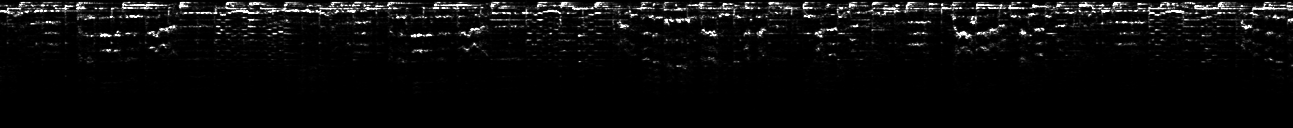

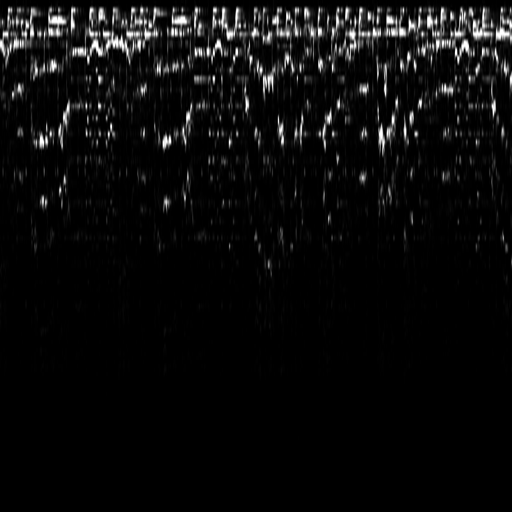

In [ ]:
#from wav to tiff
import librosa
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/content/drive/MyDrive/Workshop2022/Dataset/Music/Splitted_wavs/" #file location of mono wav files
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

i = 15

audio = '/content/drive/MyDrive/Workshop2022/Dataset/Music/mendil2.wav'

print(audio_clips[i])
#y, sr = librosa.load(audio_fpath + audio_clips[i])
y, sr = librosa.load(audio)
song, _ = librosa.effects.trim(y)
n_fft = 2048
hop_length = 512
n_mels = 128
S = librosa.feature.melspectrogram(song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

from PIL import Image

im = Image.fromarray(S).convert('RGB')
orig_size = im.size
im.show()

display(im)

im = im.resize((512, 512))

display(im)
#spect_name = audio_clips[i].replace('.wav', '.png')
im.save("/content/drive/MyDrive/Workshop2022/Dataset/Music/mendil2.png")

# # from tiff to wav
# im = Image.open("/content/drive/MyDrive/Workshop2022/Dataset/Music/Alternative_Spectrograms/...")
#im = im.resize(orig_size)
#im = im.convert('F')
#import numpy as np

#img = np.array(im)
#wav = librosa.feature.inverse.mel_to_audio(img)
#print(img)
#import soundfile

#soundfile.write("/content/drive/MyDrive/Workshop2022/Dataset/Music/test.wav", wav, samplerate=sr)

In [ ]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/content/drive/MyDrive/Workshop2022/Dataset/Music/Splitted_wavs/" #file location of mono wav files
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))
audio_clips[0]

for i in range(len(audio_clips)):
  x, sr = librosa.load(audio_fpath + audio_clips[i], sr = 44100)
  print(type(x), type(sr))
  print(x.shape, sr)
  print(audio_clips[i])

  #plt.figure(figsize=(14, 5))
  #librosa.display.waveshow(x, sr=sr)

  X = librosa.stft(x)
  Xdb = librosa.amplitude_to_db(abs(X))
  #plt.figure(figsize=(14, 5))
  #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
  #plt.colorbar()

  #plt.figure(figsize=(14, 5))
  #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  #plt.colorbar()

  plt.figure(figsize=(14,14))
  librosa.display.specshow(Xdb, sr=sr)
  plt.savefig('/content/drive/MyDrive/Workshop2022/Dataset/Music/Spectrograms/' + audio_clips[i].replace('.wav', '')) #file location of spectrogram images

No. of .wav files in audio folder =  552
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ada Sahilleri1.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ada Sahilleri2.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ada Sahilleri3.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ada Sahilleri4.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ada Sahilleri5.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ada Sahilleri6.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ada Sahilleri7.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)1.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)2.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)3.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Ajda Pekkan _ Enrico Macias - Hoş Gör Sen (1975)4.wav
<clas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
ANKARALI AYŞE - DENİZLİNİN HOROZLARI3.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
ANKARALI AYŞE - DENİZLİNİN HOROZLARI4.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
ANKARALI AYŞE - DENİZLİNİN HOROZLARI5.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
ANKARALI AYŞE - DENİZLİNİN HOROZLARI6.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
ANKARALI AYŞE - DENİZLİNİN HOROZLARI7.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Armenaki1.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Armenaki2.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Armenaki3.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Armenaki4.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Armenaki5.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100
Armenaki6.wav
<class 'numpy.ndarray'> <class 'int'>
(689152,) 44100
Armenaki7.wav
<class 'numpy.ndarray'> <class 'i

**Converting manually wavs to spectrograms**

No. of .wav files in audio folder =  534
Al şu mumu eline yak demedim mi - İstiklâl Korosu5.wav
<class 'numpy.ndarray'> <class 'int'>
(1323008,) 44100


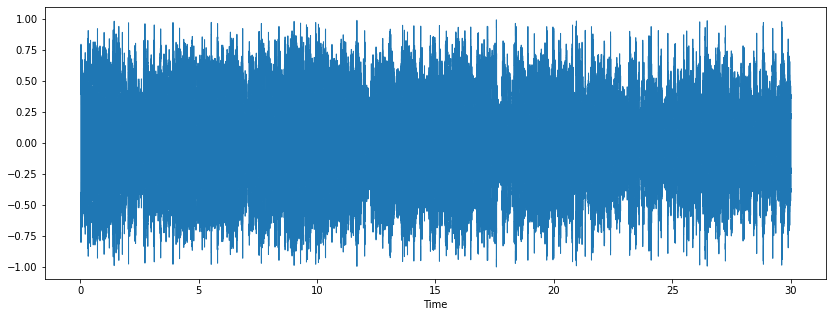

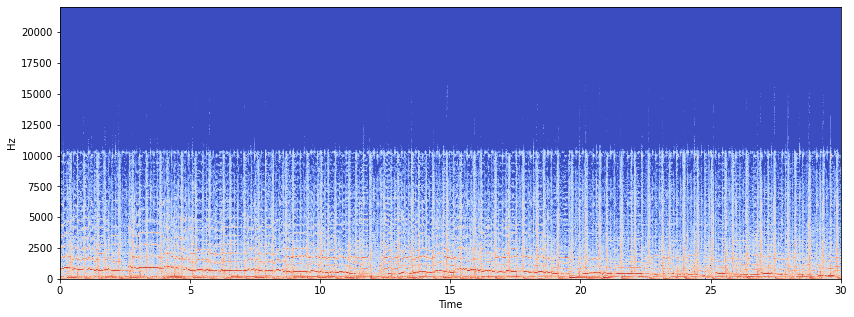

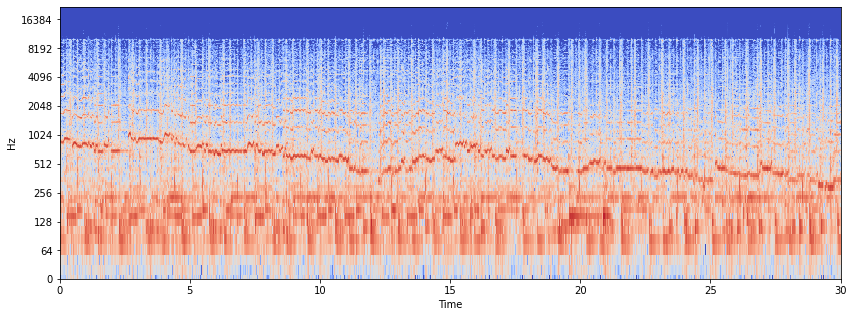

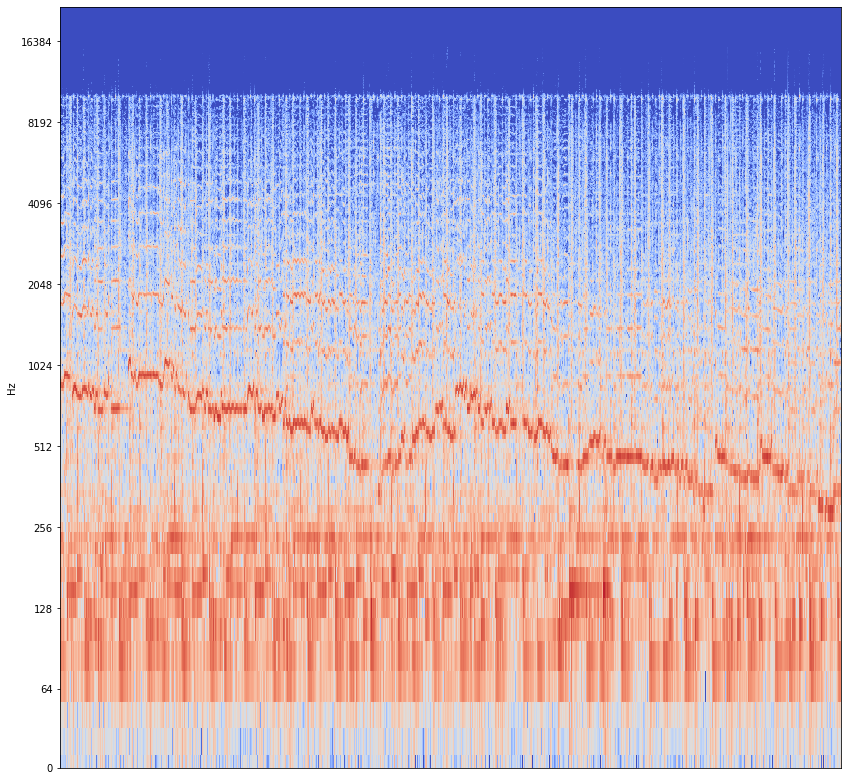

In [ ]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/content/drive/MyDrive/Workshop2022/Dataset/Music/Splitted_wavs/" #file location of mono wav files
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

i = 15

audio = '/content/drive/MyDrive/Workshop2022/Dataset/Music/mendil6.wav'

print(audio_clips[i])


#x, sr = librosa.load(audio_fpath+audio_clips[i], sr=44100)
x, sr = librosa.load(audio, sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
#plt.colorbar()

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
#plt.colorbar()

plt.figure(figsize=(14,14))
librosa.display.specshow(Xdb, sr=sr, y_axis='log')
#plt.savefig('/content/drive/MyDrive/Workshop2022/Dataset/Music/Test_Spec/' + 'test1.png') #file location of spectrogram images

# **Resizing and Pairing Images**


**Resizing Images**

In [ ]:
from PIL import Image
import os, sys

path = "/content/drive/MyDrive/Workshop2022/Dataset/Music/Spectrograms/"
dir_path = '/content/drive/MyDrive/Workshop2022/Dataset/Music/Resized_Spectrograms/'
dirs = os.listdir(path)


for item in dirs:
    if os.path.isfile(path+item):
        im = Image.open(path+item)
        #width, height = im.size
        #left = 175
        #top = 167
        #right = 1261
        #bottom = 1248
        #im1 = im.crop((left, top, right, bottom))
        f, e = os.path.splitext(path+item)
        f = f.replace('/content/drive/MyDrive/Workshop2022/Dataset/Music/Spectrograms/', '')
        imResize = im.resize((512,512), Image.ANTIALIAS)
        imResize.save(dir_path + f + 'resized.png', 'PNG', quality=90)

In [ ]:
from PIL import Image
import os, sys

path = "/content/drive/MyDrive/Workshop2022/Dataset/Architecture/Unprocessed_Image_Data/"
dir_path = '/content/drive/MyDrive/Workshop2022/Dataset/Architecture/Resized_Architecture/'
dirs = os.listdir(path)


for item in dirs:
    if os.path.isfile(path+item):
        im = Image.open(path+item)
        f, e = os.path.splitext(path+item)
        f = f.replace('/content/drive/MyDrive/Workshop2022/Dataset/Architecture/Unprocessed_Image_Data/', '')
        imResize = im.resize((600,600), Image.ANTIALIAS)
        imResize.save(dir_path + f + 'resized.png', 'PNG', quality=90)

**Pairing architecture with spectrograms**

In [ ]:
import os, sys
from os import path
from os import listdir
from os.path import isfile, join
from PIL import Image

# files
src_1 = "/content/drive/MyDrive/Workshop2022/Dataset/Architecture/Resized_Architecture/"  #file location of Architecture Images
src_2 = "/content/drive/MyDrive/Workshop2022/Dataset/Music/Alternative_Spectrograms/"         #file location of Spectrogram Images
arch_files = os.listdir(src_1)
spect_files = os.listdir(src_2)

dst = "/content/drive/MyDrive/Workshop2022/Dataset/Pairs/Train_4/" #file location of train folder

for i in range(len(spect_files)):
  image1 = Image.open(src_2 + spect_files[i])
  image2 = Image.open(src_1 + arch_files[i])
  image1_size = image1.size
  image2_size = image2.size
  new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
  new_image.paste(image1,(0,0))
  new_image.paste(image2,(image1_size[0],0))
  new_image.save( dst + str(i+1) + ".jpg","JPEG")
  #new_image.show()


# **Loading Images**

In [ ]:
# load, split and scale the maps dataset ready for training
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
 
# load all images in a directory into memory
def load_images(path, size=(256,512)):
	src_list, tar_list = list(), list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# split into satellite and map
		spect_img, arch_img = pixels[:, :256], pixels[:, 256:]
		src_list.append(spect_img)
		tar_list.append(arch_img)
	return [asarray(src_list), asarray(tar_list)]
 
# dataset path
path = '/content/drive/MyDrive/Workshop2022/Dataset/Pairs/Train/'
# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
filename = '/content/drive/MyDrive/Workshop2022/Dataset/Colab_Notebook/music_256.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

Loaded:  (226, 256, 256, 3) (226, 256, 256, 3)
Saved dataset:  /content/drive/MyDrive/Workshop2022/Dataset/Colab_Notebook/music_256.npz


Plotting Loaded Images to Confirm

Loaded:  (226, 256, 256, 3) (226, 256, 256, 3)


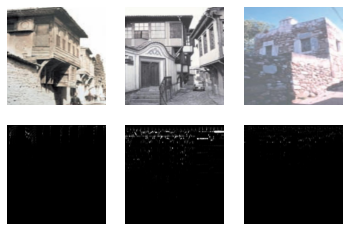

In [ ]:
# load the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
#data = load('local_256.npz')
data = load('/content/drive/MyDrive/Workshop2022/Dataset/Colab_Notebook/music_256.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

# **Developing and Training Pix2Pix Model**

In [ ]:
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

**Defining Discriminator Model !!!**

In [ ]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	#d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C1024
	#d = Conv2D(1024, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	#d = BatchNormalization()(d)
	#d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

**Defining Generator Model !!!**

In [ ]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model
def define_generator(image_shape=(512,512,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	#e8 = define_encoder_block(e7, 1024)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	#d1 = decoder_block(b, e7, 1024)
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

**Defining the Combined Generator and Discriminator Model**

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

**Loading and Preparing Training Images**

In [ ]:
# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1] 
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

**Training the discriminator will require batches of real and fake images.**

Real Class Label

In [ ]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

Fake Class Label

In [ ]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

Reviewing the generated images at the end of training and use the image quality to choose a final model.

In [ ]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	pyplot.savefig('/content/drive/MyDrive/Workshop2022/Dataset/Colab_Notebook/Music_Train/' + filename1)
	pyplot.close()
	# save the generator model
	filename2 = 'model_%06d.h5' % (step+1)
	g_model.save('/content/drive/MyDrive/Workshop2022/Dataset/Colab_Notebook/Music_Train/' + filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

**Training the Model**

In [ ]:
# train pix2pix models
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		# summarize model performance
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, dataset)

# load image data
#dataset = load_real_samples('local_256.npz')
dataset = load_real_samples('/content/drive/MyDrive/Workshop2022/Dataset/Colab_Notebook/music_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
train(d_model, g_model, gan_model, dataset)

Loaded (226, 256, 256, 3) (226, 256, 256, 3)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
>18650, d1[0.005] d2[0.026] g[7.681]
>18651, d1[0.013] d2[0.049] g[8.159]
>18652, d1[0.004] d2[0.023] g[8.570]
>18653, d1[0.092] d2[0.044] g[3.847]
>18654, d1[0.020] d2[0.057] g[4.963]
>18655, d1[0.004] d2[0.020] g[8.311]
>18656, d1[0.005] d2[0.030] g[8.717]
>18657, d1[0.005] d2[0.026] g[8.758]
>18658, d1[0.065] d2[0.040] g[4.738]
>18659, d1[0.004] d2[0.028] g[11.497]
>18660, d1[0.005] d2[0.053] g[8.498]
>18661, d1[0.009] d2[0.032] g[6.709]
>18662, d1[0.010] d2[0.152] g[7.421]
>18663, d1[0.006] d2[0.050] g[7.046]
>18664, d1[0.011] d2[0.025] g[8.887]
>18665, d1[0.090] d2[0.042] g[5.766]
>18666, d1[0.293] d2[0.082] g[4.641]
>18667, d1[0.004] d2[0.092] g[9.516]
>18668, d1[0.006] d2[0.093] g[6.767]
>18669, d1[0.044] d2[0.240] g[6.427]
>18670, d1[0.097] d2[0.081] g[5.450]
>18671, d1[0.013] d2[0.043] g[7.954]
>18672, d1[0.007] d2[0.038] g[9.713]
>18673, d1[0.782] d2[0.133] g[4.648]
>18674, d1[0.006] d2[0.044] g[7.873]
>18675, d1[0.004] d2[0.101]

KeyboardInterrupt: ignored

# **Translating Images**

In [ ]:
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint

**Loading and Preparing Pix2Pix Model for translating**

In [ ]:
# example of loading a pix2pix model and using it for image to image translation
# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

**Plotting Source, Generated, and Target**

In [ ]:
# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# show title
		pyplot.title(titles[i])
	pyplot.show()

Loaded (226, 256, 256, 3) (226, 256, 256, 3)


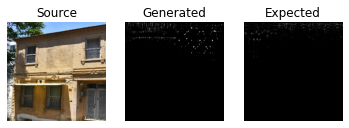

In [ ]:
# load dataset
[X1, X2] = load_real_samples('/content/drive/MyDrive/Workshop2022/Dataset/Colab_Notebook/music_256.npz')
print('Loaded', X1.shape, X2.shape)
# load model
model = load_model('/content/drive/MyDrive/Workshop2022/Dataset/Colab_Notebook/Music_Train/model_022600.h5', compile=False)
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)

# **Translating New Spectrogram Files**


In [ ]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import load
from numpy import expand_dims
from matplotlib import pyplot

Loaded (1, 256, 256, 3)


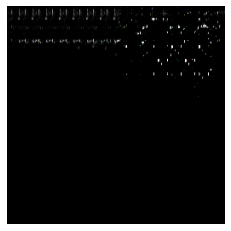

In [ ]:
# load an image
def load_image(filename, size=(256,256)):
	# load image with the preferred size
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	# reshape to 1 sample
	pixels = expand_dims(pixels, 0)
	return pixels

# load source image
src_image = load_image('/content/drive/MyDrive/Workshop2022/Dataset/Colab_Notebook/test_spec.png') #name of the single spectogram file with location
print('Loaded', src_image.shape)
# load model
model = load_model('/content/drive/MyDrive/Workshop2022/Dataset/Colab_Notebook/Music_Train/model_022600.h5', compile=False) #model file example
# generate image from source
gen_image = model.predict(src_image)
# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0
# plot the image
pyplot.imshow(gen_image[0])
pyplot.axis('off')
pyplot.show()